<a href="https://colab.research.google.com/github/AdrianaMF45/Practica3/blob/main/Copia_de_Practica3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [ ]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  5106k      0 --:--:-- --:--:-- --:--:-- 5119k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [ ]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [ ]:
num_filas, num_columnas = fifa_df.shape
print("El dataset tiene {} filas y {} columnas.".format(num_filas, num_columnas))

El dataset tiene 18207 filas y 21 columnas.


### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


In [ ]:
stats_generales = fifa_df.describe()
print(stats_generales)


                  ID  Jersey Number           Age       Overall     Potential  \
count   18207.000000   18147.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606      19.546096     25.122206     66.238699     71.307299   
std     29965.244204      15.947765      4.669943      6.908930      6.136496   
min        16.000000       1.000000     16.000000     46.000000     48.000000   
25%    200315.500000       8.000000     21.000000     62.000000     67.000000   
50%    221759.000000      17.000000     25.000000     66.000000     71.000000   
75%    236529.500000      26.000000     28.000000     71.000000     75.000000   
max    246620.000000      99.000000     45.000000     94.000000     95.000000   

           Shooting       Defense       Passing      Physical       Control  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      47.736274     47.459001     53.710612     64.344512     59.236357   
std       15.621702     17.314439

## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [ ]:
fifa_df_limpio = fifa_df.dropna(axis=0)

print(fifa_df_limpio.head())


       ID               Name Nationality                 Club  Jersey Number  \
0  158023           L. Messi   Argentina         FC Barcelona           10.0   
1   20801  Cristiano Ronaldo    Portugal             Juventus            7.0   
2  190871          Neymar Jr      Brazil  Paris Saint-Germain           10.0   
3  193080             De Gea       Spain    Manchester United            1.0   
4  192985       K. De Bruyne     Belgium      Manchester City            7.0   

     Value   Wage  Age Height  Weight  ... Position Overall  Potential  \
0  €110.5M  €565K   31    5'7  159lbs  ...       RF      94         94   
1     €77M  €405K   33    6'2  183lbs  ...       ST      94         94   
2  €118.5M  €290K   26    5'9  150lbs  ...       LW      92         93   
3     €72M  €260K   27    6'4  168lbs  ...       GK      91         93   
4    €102M  €355K   27   5'11  154lbs  ...      RCM      91         92   

   Shooting  Defense  Passing  Physical  Control  Mental  GoalKeeping  
0 

Verifica que no hay más datos faltantes:

In [ ]:
datos_faltantes_despues = fifa_df_limpio.isna().sum(axis=0)
print(datos_faltantes_despues)


ID                0
Name              0
Nationality       0
Club              0
Jersey Number     0
Value             0
Wage              0
Age               0
Height            0
Weight            0
Preferred Foot    0
Position          0
Overall           0
Potential         0
Shooting          0
Defense           0
Passing           0
Physical          0
Control           0
Mental            0
GoalKeeping       0
dtype: int64


Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [ ]:
empty_columns = fifa_df_limpio.isna().sum(axis=0).to_frame().T
print(empty_columns)


   ID  Name  Nationality  Club  Jersey Number  Value  Wage  Age  Height  \
0   0     0            0     0              0      0     0    0       0   

   Weight  ...  Position  Overall  Potential  Shooting  Defense  Passing  \
0       0  ...         0        0          0         0        0        0   

   Physical  Control  Mental  GoalKeeping  
0         0        0       0            0  

[1 rows x 21 columns]


In [ ]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

In [ ]:
fifa_df = fifa_df_limpio


### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [ ]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [ ]:
def currency_to_numeric(currency):
    symbols = {"K": 1000, "M": 1000000}

    if not isinstance(currency, str):
        currency = str(currency)

    cantidad_sin_simbolo = currency[1:]
    ultimo_caracter = cantidad_sin_simbolo[-1]
    if ultimo_caracter.isalpha():
        cantidad_numerica = float(cantidad_sin_simbolo[:-1])
        multiplicador = symbols[ultimo_caracter]
        numeric = cantidad_numerica * multiplicador
    else:
        numeric = float(cantidad_sin_simbolo)

    return numeric


Prueba tu función:

In [ ]:
currency_to_numeric("$20")

20.0

In [ ]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas Wage y Value a numéricos usando currency_to_numeric elemento por elemento con applymap:


In [ ]:
fifa_df[['Wage', 'Value']] = fifa_df[['Wage', 'Value']].applymap(currency_to_numeric)


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   5056      0 --:--:-- --:--:-- --:--:--  5078


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [ ]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [ ]:
merged_df = fifa_df.# <rellena>

SyntaxError: invalid syntax (<ipython-input-24-dfc59535ecee>, line 1)

In [ ]:
merged_df = pd.merge(fifa_df, positions_df, left_on='Position', right_on='Abbreviation', how='left')


In [ ]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,ST,Striker
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,LW,Left Wing
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,GK,Goalkeeper
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,RCM,Right Center Midfield


In [ ]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [ ]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] + ")"


Muestra la columna actualizada:

In [ ]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1          Striker (ST)
2        Left Wing (LW)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [ ]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0


In [ ]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [ ]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,Goalkeeper (GK),91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [ ]:
fifa_df.# <completa>

SyntaxError: invalid syntax (<ipython-input-33-e664d68556fb>, line 1)

In [ ]:
top_jugadores_mejor_pagados = fifa_df.nlargest(3, 'Wage')
print(top_jugadores_mejor_pagados)


       ID       Name Nationality          Club  Jersey Number        Value  \
0  158023   L. Messi   Argentina  FC Barcelona           10.0  110500000.0   
7  176580  L. Suárez     Uruguay  FC Barcelona            9.0   80000000.0   
6  177003  L. Modrić     Croatia   Real Madrid           10.0   67000000.0   

       Wage  Age Height  Weight  ...                     Position Overall  \
0  565000.0   31    5'7  159lbs  ...           Right Forward (RF)      94   
7  455000.0   31    6'0  190lbs  ...              Right Side (RS)      91   
6  420000.0   32    5'8  146lbs  ...  Right Center Midfield (RCM)      91   

   Potential  Shooting  Defense  Passing  Physical  Control  Mental  \
0         94      86.0     41.0     87.0      80.0     96.0    95.0   
7         91      86.0     56.0     74.0      81.0     87.0    87.0   
6         91      76.0     74.0     89.0      79.0     92.0    89.0   

   GoalKeeping  
0         11.0  
7         31.0  
6         10.0  

[3 rows x 21 columns]


In [ ]:
top_valor_comercial = merged_df.nlargest(3, 'Value')
print(top_valor_comercial)


       ID          Name Nationality                 Club  Jersey Number  \
2  190871     Neymar Jr      Brazil  Paris Saint-Germain           10.0   
0  158023      L. Messi   Argentina         FC Barcelona           10.0   
4  192985  K. De Bruyne     Belgium      Manchester City            7.0   

         Value      Wage  Age Height  Weight  ...  \
2  118500000.0  290000.0   26    5'9  150lbs  ...   
0  110500000.0  565000.0   31    5'7  159lbs  ...   
4  102000000.0  355000.0   27   5'11  154lbs  ...   

                      Position Overall  Potential  Shooting  Defense  Passing  \
2               Left Wing (LW)      92         93      81.0     42.0     80.0   
0           Right Forward (RF)      94         94      86.0     41.0     87.0   
4  Right Center Midfield (RCM)      91         92      81.0     65.0     92.0   

   Physical  Control  Mental  GoalKeeping  
2      79.0     92.0    92.0         12.0  
0      80.0     96.0    95.0         11.0  
4      77.0     85.0    91.0 

Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [ ]:
top_jugadores_mejor_pagados = fifa_df.nlargest(3, 'Wage')
print(top_jugadores_mejor_pagados)


       ID       Name Nationality          Club  Jersey Number        Value  \
0  158023   L. Messi   Argentina  FC Barcelona           10.0  110500000.0   
7  176580  L. Suárez     Uruguay  FC Barcelona            9.0   80000000.0   
6  177003  L. Modrić     Croatia   Real Madrid           10.0   67000000.0   

       Wage  Age Height  Weight  ...                     Position Overall  \
0  565000.0   31    5'7  159lbs  ...           Right Forward (RF)      94   
7  455000.0   31    6'0  190lbs  ...              Right Side (RS)      91   
6  420000.0   32    5'8  146lbs  ...  Right Center Midfield (RCM)      91   

   Potential  Shooting  Defense  Passing  Physical  Control  Mental  \
0         94      86.0     41.0     87.0      80.0     96.0    95.0   
7         91      86.0     56.0     74.0      81.0     87.0    87.0   
6         91      76.0     74.0     89.0      79.0     92.0    89.0   

   GoalKeeping  
0         11.0  
7         31.0  
6         10.0  

[3 rows x 21 columns]


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [ ]:
fifa_df["Potential left"] = # <rellena>
fifa_df.head()

SyntaxError: invalid syntax (<ipython-input-37-d33d2d62b52a>, line 1)

In [ ]:
fifa_df['Potential left'] = fifa_df['Potential'] - fifa_df['Overall']

print(fifa_df.head())


       ID               Name Nationality                 Club  Jersey Number  \
0  158023           L. Messi   Argentina         FC Barcelona           10.0   
1   20801  Cristiano Ronaldo    Portugal             Juventus            7.0   
2  190871          Neymar Jr      Brazil  Paris Saint-Germain           10.0   
3  193080             De Gea       Spain    Manchester United            1.0   
4  192985       K. De Bruyne     Belgium      Manchester City            7.0   

         Value      Wage  Age Height  Weight  ... Overall Potential  Shooting  \
0  110500000.0  565000.0   31    5'7  159lbs  ...      94        94      86.0   
1   77000000.0  405000.0   33    6'2  183lbs  ...      94        94      88.0   
2  118500000.0  290000.0   26    5'9  150lbs  ...      92        93      81.0   
3   72000000.0  260000.0   27    6'4  168lbs  ...      91        93      21.0   
4  102000000.0  355000.0   27   5'11  154lbs  ...      91        92      81.0   

   Defense  Passing  Physical  C

### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [ ]:
j_promesa = fifa_df[fifa_df['Age'] < 22]
j_promesa = j_promesa.sort_values(by=['Potential', 'Potential left', 'Overall'], ascending=True)

top_jovenes_promesa = j_promesa.head(5)

print(top_jovenes_promesa)


           ID           Name     Nationality                    Club  \
17895  241657      D. Horton         England            Lincoln City   
17567  233945         Wu Wei        China PR     Tianjin Quanjian FC   
17858  225510      D. Mackay        Scotland              Kilmarnock   
17670  245401   Lee Dong Hee  Korea Republic          Jeju United FC   
17689  225468  M. Bloomfield         England  Hamilton Academical FC   

       Jersey Number    Value    Wage  Age Height  Weight  ... Overall  \
17895           33.0  40000.0  1000.0   18    6'1  179lbs  ...      48   
17567            2.0  60000.0  2000.0   21    6'1  176lbs  ...      52   
17858           13.0  30000.0  1000.0   21    6'3  179lbs  ...      49   
17670           42.0  50000.0  1000.0   21   5'11  159lbs  ...      51   
17689           16.0  50000.0  3000.0   21   5'11  165lbs  ...      51   

      Potential  Shooting  Defense  Passing  Physical  Control  Mental  \
17895        55      36.0     47.0     46.0     

In [ ]:
fifa_df.#<completa>

SyntaxError: invalid syntax (<ipython-input-39-68f3619fa509>, line 1)

### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [ ]:
indice_mejor_defen = fifa_df['Defense'].idxmax()
mejor_defen = fifa_df.loc[indice_mejor_defen]
print(mejor_defen)


ID                                         215914
Name                                     N. Kanté
Nationality                                France
Club                                      Chelsea
Jersey Number                                13.0
Value                                  63000000.0
Wage                                     225000.0
Age                                            27
Height                                        5'6
Weight                                     159lbs
Preferred Foot                              Right
Position          Left Defensive Midfielder (LDM)
Overall                                        89
Potential                                      90
Shooting                                     58.0
Defense                                      86.0
Passing                                      78.0
Physical                                     83.0
Control                                      84.0
Mental                                       86.0


In [ ]:
idx = #<completa>
fifa_df[["Name", "Club", "Defense", "Position"]].# <completa>

SyntaxError: invalid syntax (<ipython-input-41-4601ebcdd099>, line 1)

In [ ]:
idx = fifa_df['Defense'].idxmax()


In [ ]:
mejor_defen_in= fifa_df.loc[idx, ["Name", "Club", "Defense", "Position"]]


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [ ]:
# <completa>

In [ ]:
cont_pierna = fifa_df['Preferred Foot'].value_counts()

porcentaje_derecha = (cont_pierna['Right'] / fifa_df.shape[0]) * 100
porcentaje_izquierda = (cont_pierna['Left'] / fifa_df.shape[0]) * 100

print("Porcentaje de jugadores que tienen preferencia por usar pierna derecha: {:.2f}%".format(porcentaje_derecha))
print("Porcentaje de jugadores que tienen preferencia por usar pierna izquierda: {:.2f}%".format(porcentaje_izquierda))


Porcentaje de jugadores que tienen preferencia por usar pierna derecha: 76.77%
Porcentaje de jugadores que tienen preferencia por usar pierna izquierda: 23.23%


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [ ]:
prom_nivel_equipo = fifa_df.groupby('Club')['Overall'].mean()

mejores_equipos = prom_nivel_equipo.sort_values(ascending=False)

print(mejores_equipos.head())


Club
Juventus       82.280000
Napoli         80.000000
Inter          79.750000
Real Madrid    78.242424
Milan          78.074074
Name: Overall, dtype: float64


In [ ]:
fifa_df.# <completa>

SyntaxError: invalid syntax (<ipython-input-48-e664d68556fb>, line 1)

### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [ ]:
valor_equipo = fifa_df.groupby('Club')['Value'].sum()
equipos_cost = valor_equipo.sort_values(ascending=False)
print(equipos_cost)


Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
                        ...     
Sligo Rovers           3295000.0
Bohemian FC            3195000.0
Derry City             2795000.0
Limerick FC            2040000.0
Bray Wanderers         1930000.0
Name: Value, Length: 651, dtype: float64


In [ ]:
fifa_df# <completa>

### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [ ]:
players_mx_df = # <completa>
players_mx_df.head(3)

SyntaxError: invalid syntax (<ipython-input-47-e48a447e1223>, line 1)

In [ ]:
players_mx_df = fifa_df[fifa_df['Nationality'] == 'Mexico']


In [ ]:
print(players_mx_df.head(3))


         ID         Name Nationality        Club  Jersey Number       Value  \
306  171897  A. Guardado      Mexico  Real Betis           18.0  19000000.0   
329  221992    H. Lozano      Mexico         PSV           22.0  24000000.0   
371  193165    J. Corona      Mexico    FC Porto           17.0  21500000.0   

        Wage  Age Height  Weight  ... Overall Potential  Shooting  Defense  \
306  35000.0   31    5'7  148lbs  ...      82        82      70.0     73.0   
329  22000.0   22    5'9  154lbs  ...      81        86      71.0     46.0   
371  18000.0   25    5'8  137lbs  ...      81        83      71.0     50.0   

     Passing  Physical  Control  Mental  GoalKeeping  Potential left  
306     80.0      76.0     84.0    80.0         10.0               0  
329     72.0      81.0     80.0    76.0         12.0               5  
371     72.0      75.0     87.0    81.0         10.0               2  

[3 rows x 22 columns]


In [ ]:
players_mx = fifa_df[fifa_df['Nationality'] == 'Mexico']
conteoplayers_equipo = players_mx.groupby('Club').size()
equi_mas_mexicanos = conteoplayers_equipo.sort_values(ascending=False)
print(equi_mas_mexicanos.head(5))


Club
Guadalajara    29
U.N.A.M.       21
Club Atlas     20
Club Necaxa    20
Querétaro      19
dtype: int64


Agrupa por el nombre del club y cuenta:

In [ ]:
players_mx_df.# <completa>

SyntaxError: invalid syntax (<ipython-input-51-edefd6d34b19>, line 1)

In [ ]:
players_mx_por_equipo = players_mx_df.groupby('Club').size()


In [ ]:
print(players_mx_por_equipo)


Club
Atlético Huila                  1
Boyacá Chicó FC                 2
CD Everton de Viña del Mar      4
CD Feirense                     1
Chicago Fire                    1
Club América                   18
Club Atlas                     20
Club León                      18
Club Necaxa                    20
Club Tijuana                   16
Cruz Azul                      16
Deportivo Toluca               17
Eintracht Frankfurt             2
FC Dallas                       1
FC Groningen                    1
FC Porto                        2
Fenerbahçe SK                   1
Guadalajara                    29
LA Galaxy                       2
La Equidad                      1
Lobos BUAP                     16
Los Angeles FC                  1
Monarcas Morelia               17
Monterrey                      16
PSV                             2
Pachuca                        18
Puebla FC                      18
Querétaro                      19
RC Celta                        1
Real Beti

## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

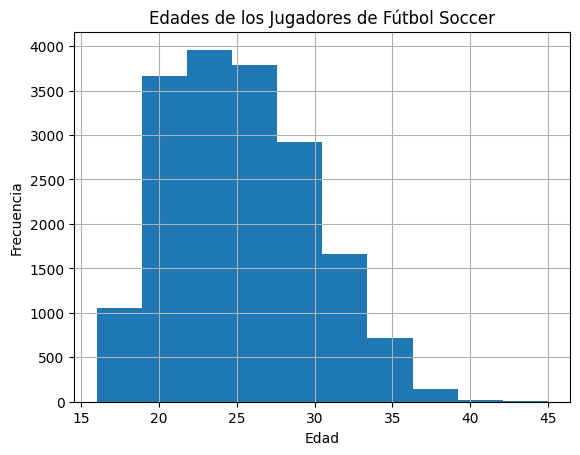

In [ ]:
import matplotlib.pyplot as plt
edades = fifa_df['Age']
edades.hist()
plt.title('Edades de los Jugadores de Fútbol Soccer')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


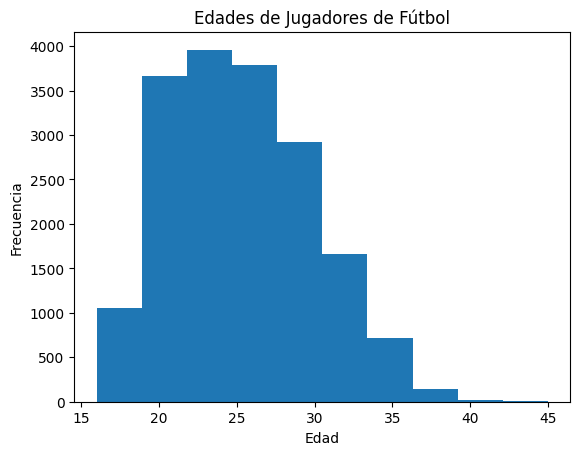

In [ ]:
fifa_df['Age'].plot.hist(bins=10)
plt.title('Edades de Jugadores de Fútbol')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

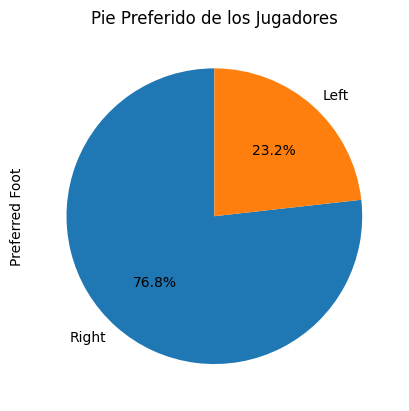

In [ ]:
cont_pie_pref = fifa_df['Preferred Foot'].value_counts()
cont_pie_pref.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Preferido de los Jugadores')
plt.show()


### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

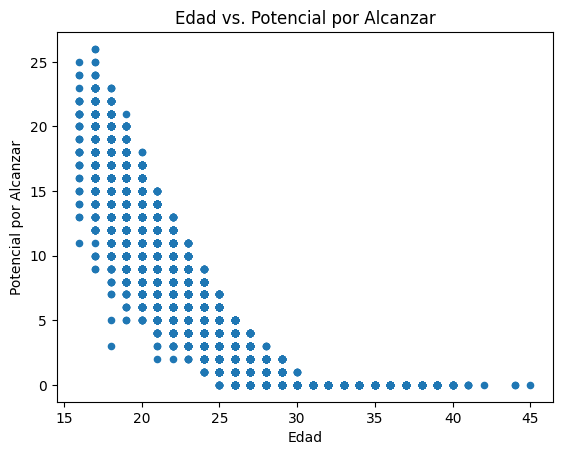

In [ ]:
fifa_df.plot.scatter(x='Age', y='Potential left')
plt.title('Edad vs. Potencial por Alcanzar')
plt.xlabel('Edad')
plt.ylabel('Potencial por Alcanzar')
plt.show()


¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = fifa_df[['Shooting', 'Defense', 'Passing', 'Physical', 'Control', 'Mental', 'GoalKeeping']]
y = fifa_df['Position']
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_entrenamiento, y_entrenamiento)
y_pred = modelo.predict(X_prueba)
precision = accuracy_score(y_prueba, y_pred)
print("Precisión:", precision)
habilidades_nuevo_jugador = [[75, 60, 80, 70, 85, 70, 10]]
posicion_predicha = modelo.predict(habilidades_nuevo_jugador)
print("Posición predicha:", posicion_predicha)


Precisión: 0.45731026785714285
Posición predicha: ['Central Attacking Midfielder (CAM)']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

def euclidean_distance(p1, p2):
    """

    p1 (numpy.ndarray): Primer vector.
    p2 (numpy.ndarray): Segundo vector.

    Returns:
    float: La distancia euclidiana entre los dos vectores.
    """
    return np.sqrt(np.sum((p1 - p2) ** 2))
representantes = {
    "Delantero": np.array([90, 30, 80, 70, 90, 60, 10]),
    "Centrocampista": np.array([70, 60, 90, 80, 85, 75, 20]),
    "Defensor": np.array([50, 80, 70, 90, 70, 70, 30]),
    "Portero": np.array([20, 70, 40, 60, 60, 50, 90])
}
nuevas_habilidades_jugador = np.array([80, 40, 70, 75, 80, 65, 15])
distancias = {posicion: euclidean_distance(nuevas_habilidades_jugador, habilidades) for posicion, habilidades in representantes.items()}
posicion_predicha = min(distancias, key=distancias.get)
print("La predicción de la posición del nuevo jugador sería:", posicion_predicha)


La predicción de la posición del nuevo jugador sería: Delantero
